## Importing necessary libraries

In [93]:
#Data manipulation and handling libraries
import pandas as pd 
import numpy as np

#NMF
from sklearn.decomposition import NMF

#KMeans
from sklearn.cluster import KMeans

#Data visualization
import matplotlib.pyplot as plt 

from sklearn.neighbors import NearestNeighbors

### Loading the DataSet

In [10]:
df = pd.read_csv("spotify.xls",index_col=0)

In [11]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [12]:
df.tail()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_996,8,0,11,10,1,10,13,13,10,6,...,10,0,8,4,0,7,13,7,2,6
user_997,7,6,9,6,15,6,14,2,9,7,...,15,9,2,2,6,1,0,5,15,11
user_998,6,2,1,5,1,7,2,4,4,0,...,0,13,6,13,0,1,11,13,6,13
user_999,7,0,8,12,6,2,6,2,0,12,...,14,7,12,3,5,15,5,11,9,12
user_1000,6,15,0,14,1,11,8,8,14,7,...,12,5,0,4,2,4,0,15,4,5


### Understanding the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, user_1 to user_1000
Columns: 5000 entries, song_1 to song_5000
dtypes: int64(5000)
memory usage: 38.2+ MB


In [18]:
df.shape

(1000, 5000)

In [19]:
df.isnull().sum().sum()

0

In [20]:
x =df.values

In [21]:
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## Non-Negative Matrix Factorization (NMF)

In [24]:
nmf = NMF(n_components=100,max_iter=1000,random_state=10)
# n_components = features , max_iter = no. of iterations allowed 

In [25]:
nmf.fit(x)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\hp\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


NMF(max_iter=1000, n_components=100, random_state=10)

In [26]:
user_matrix = nmf.transform(x)

In [36]:
song_matrix=nmf.components_.T

# T is transpose , we used this because we want to have same no. of columns for user matrix and song matrix

In [30]:
user_matrix

array([[0.        , 0.        , 1.65917367, ..., 0.        , 0.        ,
        1.87570247],
       [0.        , 0.        , 0.        , ..., 2.8027976 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 4.62367029,
        0.        ],
       [0.        , 2.11579518, 0.00829455, ..., 0.        , 0.        ,
        1.07232688],
       [0.        , 0.        , 0.        , ..., 0.        , 1.69048514,
        0.        ]])

In [31]:
song_matrix

array([[0.        , 0.24795046, 0.02185775, ..., 0.13157294, 0.        ,
        0.19138292],
       [0.25238391, 0.18164336, 0.        , ..., 0.07732547, 0.0418576 ,
        0.        ],
       [0.46913486, 0.21636686, 0.00763448, ..., 0.31286831, 0.        ,
        0.40977389],
       ...,
       [0.01743582, 0.16529751, 0.23152147, ..., 0.21842531, 0.30490947,
        0.23801301],
       [0.        , 0.45217501, 0.31117264, ..., 0.16388584, 0.34932455,
        0.        ],
       [0.20204397, 0.17037827, 0.15762438, ..., 0.15301826, 0.15805216,
        0.04300445]])

In [34]:
user_matrix.shape

#we have 1000 users and 100 song categories

(1000, 100)

In [35]:
song_matrix.shape

#we have 5000 different songs and 100 song categories

(5000, 100)

## Steps for building recommendation system - Type 1(small datasets example local library)
Steps:
1. Consider recommending songs to the first user(row location 0 in user matrix)
2. Find the Eucladian distance between and remaining 999 users
3. Find out top 10 songs heard by nearest 5 users.
4. Recommend these 10songs to user 1.

### Calculating the distance

In [41]:
def distance(u1,u2):
    return pow(sum(pow(u1[x]-u2[x],2)for x in range(len(u1))),0.5)

In [42]:
distance(user_matrix[0],user_matrix[1])

15.974796491722733

### Eucladian distance between user 1 and remaining 999 users

In [47]:
def dist_remaining_users(b_user,user_matrix):
    dist=[]
    for i in range (len(user_matrix)):
        if b_user !=i:
            dist.append(distance(user_matrix[b_user],user_matrix[i]))
            
    return dist
            
        

In [49]:
dist_user0 = dist_remaining_users(0,user_matrix)

In [50]:
dist_user0

[15.974796491722733,
 15.296872669955844,
 14.157163906277022,
 12.8825212946109,
 14.494613088507288,
 14.083129901640728,
 14.510940733395959,
 14.781051930004569,
 16.05410228449727,
 15.232605177774602,
 14.756409192670434,
 13.363410183652558,
 13.986566398532771,
 11.761829427335918,
 14.309694234841976,
 14.162528830769133,
 14.536594878964024,
 15.429655224939642,
 13.995600529003633,
 13.0181469457117,
 13.61079661239958,
 14.696985228628783,
 13.66999366004905,
 14.658734733385575,
 13.251928973945258,
 15.748330125342411,
 13.376868378904362,
 12.593932447476417,
 14.497009527426748,
 15.088174052334603,
 15.442432625823546,
 14.432540235124867,
 13.947018689775893,
 14.00418633205304,
 12.854843865797381,
 14.18735333687724,
 14.349925532962429,
 14.06352742642019,
 14.184708280081107,
 14.20903059632734,
 15.215367680833642,
 18.67707858191073,
 14.583881322596808,
 14.131926787476505,
 15.026384523712565,
 14.801893435965528,
 13.527021408487181,
 13.010629151486103,
 12.

In [51]:
len(dist_user0)

999

### Finding nearest 5 users

In [52]:
nearest_users = np.argsort(dist_user0)[:5]

In [53]:
nearest_users

array([394, 779, 378, 349, 214], dtype=int64)

### Finding songs heard by nearest users

In [54]:
for i in nearest_users:
    print("Songs heard by user ",i,"are:")
    temp = df.iloc[i]
    print(temp[temp.values !=0].index)

Songs heard by user  394 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_11',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4694)
Songs heard by user  779 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4716)
Songs heard by user  378 are:
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_10', 'song_12',
       ...
       'song_4989', 'song_4990', 'song_4992', 'song_4993', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', len

### Finding the top 10 songs for nearest users

In [61]:
def top_n_songs(nearest_users,df,n=10):
    temp = df.iloc[nearest_users]
    dict1=temp.max().to_dict() # finding the maximum values from temp and storing in dict1
    #converting every key value pair into a tuple and swapping them for sorting purpose,end result is a list of: 
    #songs and no.of times heard
    sorted_dict = sorted(dict1.items(),key=lambda keyvalue:(keyvalue[1],keyvalue[0]),reverse=True)[:n]
    return [x[0] for x in sorted_dict]

In [62]:
top_n_songs(nearest_users,df,n=5)
#These are the top 10 songs heard by nearest users

['song_982', 'song_978', 'song_975', 'song_974', 'song_971']

## K-means Clustering - Type2 (can be used to large datasets ex: spotify)

In [66]:
wcss={}
for k in range(1,50):
    kmeans= KMeans(n_clusters=k,max_iter=1000).fit(song_matrix)
    wcss[k]=kmeans.inertia_

In [67]:
wcss

{1: 14101.984902878645,
 2: 13918.854461823035,
 3: 13788.125878441528,
 4: 13693.63205445986,
 5: 13615.174681612763,
 6: 13550.724352754656,
 7: 13490.35779298772,
 8: 13436.32989721524,
 9: 13391.133899019507,
 10: 13351.394772636457,
 11: 13320.791635590338,
 12: 13284.31846263341,
 13: 13250.415846646214,
 14: 13224.284262887779,
 15: 13199.802105174937,
 16: 13185.859938968624,
 17: 13159.8880036737,
 18: 13136.204798799681,
 19: 13121.88142439507,
 20: 13103.114028644954,
 21: 13076.965138282147,
 22: 13064.565354956225,
 23: 13045.424650763971,
 24: 13032.57912082214,
 25: 13008.900734747365,
 26: 12989.611588220876,
 27: 12979.011965405994,
 28: 12965.337584578063,
 29: 12943.265570003077,
 30: 12940.681780153098,
 31: 12929.980924459696,
 32: 12914.457339904046,
 33: 12892.94088477396,
 34: 12878.725982362359,
 35: 12875.042053370076,
 36: 12856.079916037428,
 37: 12837.671757894193,
 38: 12824.903183438735,
 39: 12827.280995988916,
 40: 12810.845664080483,
 41: 12797.8690702

Text(0, 0.5, 'wcss')

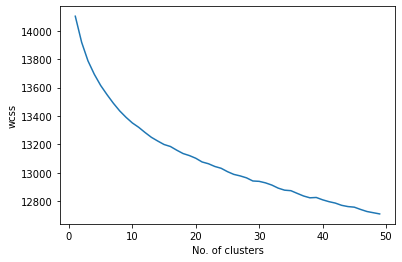

In [70]:
plt.plot(wcss.keys(),wcss.values())
plt.xlabel("No. of clusters")
plt.ylabel("wcss")

In [100]:
def songs_in_cluster(n_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans=KMeans(n_clusters=n_clusters,max_iter=1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    song_vector = song_matrix[index_in_song]
    #print(song_vector)
    all_songs_in_cluster=kmeans.predict(song_matrix)
    #print(all_songs_in_cluster)
    songs_in_selected_cluster = [x for x in range(len(all_songs_in_cluster))
                                 if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    
    #print(songs_in_selected_cluster)
    song_cluster = song_matrix[songs_in_selected_cluster]
    #print(song_cluster)
    neighbours= NearestNeighbors(n_neighbors=n_recommendation)
    neighbours.fit(song_cluster)
    recommended_songs=neighbours.kneighbors([song_vector])
   # print(recommended_songs)
    songs=df.columns
    return[songs[x] for x in recommended_songs[1][0]]
    

In [102]:
songs_in_cluster(15,df,song_matrix,"song_65",10)

['song_9',
 'song_255',
 'song_126',
 'song_315',
 'song_179',
 'song_50',
 'song_38',
 'song_132',
 'song_254',
 'song_199']